In [1]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
from skimage.io import imread
from scipy import ndimage
import os
import shutil

In [2]:
image_path = 'C:\\Users\\miste\\JPEGImages'
test_path = 'C:\\Users\\miste\\JPEGImages\\testimages'
augmentation_path = 'C:\\Users\\miste\\JPEGImages\\augmented'

In [3]:
def copy_image(source_folder, destination_folder, num_images=3):
    if not os.path.exists(destination_folder):
        os.makedirs(destination_folder)
    copied_images=0
    for filename in os.listdir(source_folder):
        if filename.endswith(".jpg"):
            source_path=os.path.join(source_folder, filename)
            destination_path=os.path.join(destination_folder, filename)
            shutil.copyfile(source_path, destination_path)
            copied_images+=1
            print(f"Copied{filename} to {destination_folder}")
            if copied_images>=num_images:
                break

In [4]:
def show(image):
    plt.figure(dpi=100)
    plt.imshow(image)
    plt.show

In [5]:
def translate(image, xshift, yshift):
    matTranslate = np.array([[1, 0, xshift], [0, 1, yshift], [0, 0, 1]])
    imageTranslated = ndimage.affine_transform(image, matTranslate)
    return imageTranslated

In [6]:
def rotate(image, theta):
    matRotate = np.array([[np.cos(theta), -np.sin(theta), 0], [np.sin(theta), np.cos(theta), 0], [0, 0, 1]])
    imageRotated = ndimage.affine_transform(image, matRotate)
    return imageRotated

In [7]:
def scale(image, scale):
    matScale = np.array([[scale, 0, 0], [0, scale, 0], [0, 0, 1]])
    imageScaled = ndimage.affine_transform(image, matScale)
    return imageScaled

In [8]:
def shear(image, shear_h, shear_v):
    matScale = np.array([[1, shear_v, 0], [shear_h, 1, 0], [0, 0, 1]])
    imageScaled = ndimage.affine_transform(image, matScale)
    return imageScaled

In [9]:
def getfiles():
    files = os.listdir(image_path)
    images = []
    i = 0
    for file in files:
        if (i < 150):
            images.append(imread(image_path + file))
            i+=1
    return images

In [10]:
def mean(image):
    mean = 0
    count = 0
    #print(image.shape)
    for v in image:
        mean += v
        count += 1
    return mean / count

In [11]:
def load_images(folder_path, width, height):
    i = 0
    images=[] 
    file_list =os.listdir(folder_path)
    for file_name in file_list:
        image_path=os.path.join(folder_path, file_name)
        image = cv2.imread(image_path)
        image=cv2.resize(image,(width,height))
        image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
        if image is not None:
            images.append(image)
            i+=1
        if (i == 150):
            break
    return images

In [12]:
def analysis(image_path, desc):
    images_b = load_images(image_path, width, height)
    images_array=np.array(images_b)
    mean_image = np.mean(images_array, axis = 0)

    plt.imshow(mean_image, cmap='gray')
    plt.title('Mean ' + desc)
    plt.axis('off')
    plt.show()

    #plot histogram 
    plt.hist(mean_image.ravel(), bins=256, range=(0,255), density=True, color='gray', alpha=0.7) 
    plt.title('Histogram of Mean ' + desc) 
    plt.xlabel('Pixel Value') 
    plt.ylabel('Frequency') 
    plt.show()

In [13]:
def augment_images(image_path, target_path):
    n = 0
    images = load_images(image_path, width, height)
    for image in images:
        shifts = [-20, -10, 0, 10, 20]
        for x in shifts:
            for y in shifts:
                newimage = translate(image, x, y)
                filename=os.path.join(target_path, 'AUGMENTED_' + str(n) + '.JPG')
                cv2.imwrite(filename, newimage)
                n+=1
        deg15 = np.pi/12
        thetas = [-3*deg15, -2*deg15, -deg15, 0, deg15, 2*deg15, 3*deg15]
        for t in thetas:
            newimage = rotate(image, t)
            filename=os.path.join(target_path, 'AUGMENTED_' + str(n) + '.JPG')
            cv2.imwrite(filename, newimage)
            n+=1
        scales = [2.0, 1.5, 1, 0.5]
        for s in scales:
            newimage = scale(image, s)
            filename=os.path.join(target_path, 'AUGMENTED_' + str(n) + '.JPG')
            cv2.imwrite(filename, newimage)
            n+=1
        shears = [-3*deg15, -2*deg15, -deg15, 0, deg15, 2*deg15, 3*deg15]
        for sh in shears:
            newimage = shear(image, 0, sh)
            filename=os.path.join(target_path, 'AUGMENTED_' + str(n) + '.JPG')
            cv2.imwrite(filename, newimage)
            n+=1
            newimage = shear(image, sh, 0)
            filename=os.path.join(target_path, 'AUGMENTED_' + str(n) + '.JPG')
            cv2.imwrite(filename, newimage)
            n+=1


Copied2007_000027.jpg to C:\Users\miste\JPEGImages\testimages
Copied2007_000032.jpg to C:\Users\miste\JPEGImages\testimages
Copied2007_000033.jpg to C:\Users\miste\JPEGImages\testimages
Copied2007_000039.jpg to C:\Users\miste\JPEGImages\testimages
Copied2007_000042.jpg to C:\Users\miste\JPEGImages\testimages
Copied2007_000068.jpg to C:\Users\miste\JPEGImages\testimages
Copied2007_000121.jpg to C:\Users\miste\JPEGImages\testimages
Copied2007_000123.jpg to C:\Users\miste\JPEGImages\testimages
Copied2007_000170.jpg to C:\Users\miste\JPEGImages\testimages
Copied2007_000175.jpg to C:\Users\miste\JPEGImages\testimages
Copied2007_000187.jpg to C:\Users\miste\JPEGImages\testimages
Copied2007_000241.jpg to C:\Users\miste\JPEGImages\testimages
Copied2007_000243.jpg to C:\Users\miste\JPEGImages\testimages
Copied2007_000250.jpg to C:\Users\miste\JPEGImages\testimages
Copied2007_000256.jpg to C:\Users\miste\JPEGImages\testimages
Copied2007_000323.jpg to C:\Users\miste\JPEGImages\testimages
Copied20

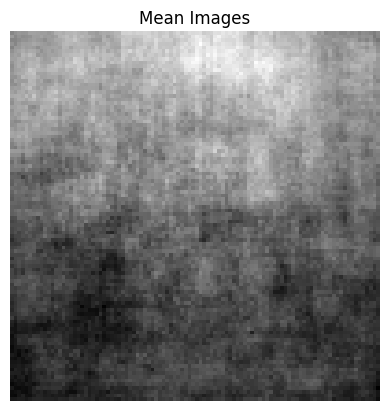

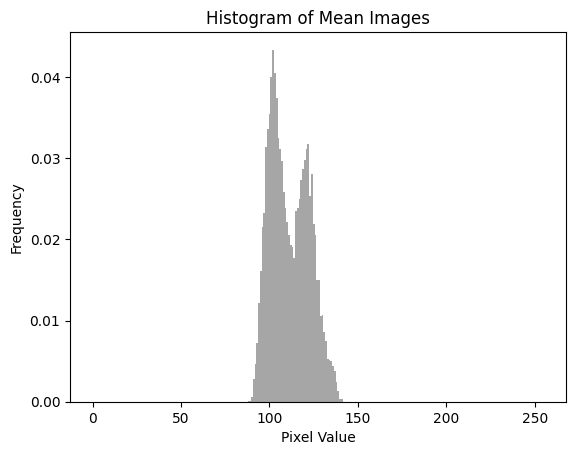

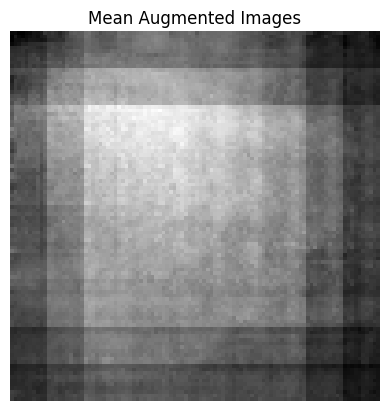

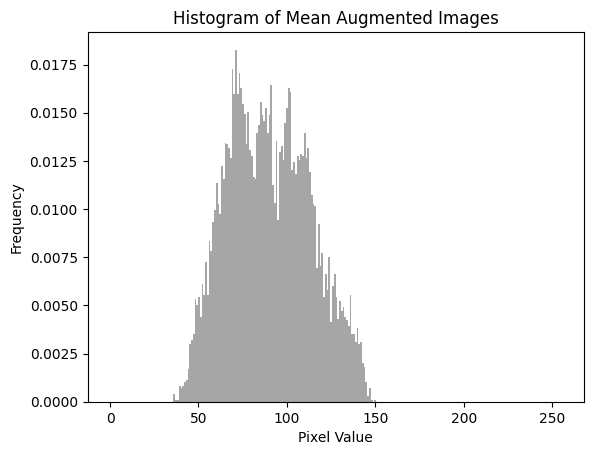

In [15]:
width=100
height=100

#Get images from the main data set.
copy_image(image_path, test_path, 150)
#Print out their statistics
analysis(test_path, 'Images')
augment_images(test_path, augmentation_path)
#Print out the new statistics
analysis(augmentation_path, 'Augmented Images')